# Investigate Anscombe's Quartet

### Libraries

In [4]:
import numpy as np #For calculations
import matplotlib.pyplot as plt #For plotting data
import statistics as s #Will be used for some statistical calculations
import pandas as pd #For data manipulationS

#Command to open relevant CSV file
df = pd.read_csv('csv/anscombe.csv')

## Background of the Dataset

Anscombe's quartet are four sets of bivariate data. They are of interest because they share many of the same measures of central tendency and variance, but when graphed it's obvious that the four data sets are very different.

<img src='http://upload.wikimedia.org/wikipedia/en/d/d5/Francis_Anscombe.jpeg' width = "350">

The four datasets were constructed by Francis Anscombe, a British statistican, who believed visualising data sets was essential to fully understanding the context of your results. 

Michael Friendly has described the early 20th Century as the ***Modern Dark Ages of Visualisation***, with mathematicans concerned with exact answers viewing graphical representations as inaccurate. By 1973, when Anscombe constructed his sets, computers were been used for statistical analysis of datasets, and many statisticans saw this as the way forward for data analysis, but programs for visualising data were still in their infancy and not widely used. 

In his introduction Anscombe points out that *'Most textbooks on statistical methods, and most statistical computer programs pay too little attention to graphs,'* suggesting that his paper was written in part as a challenge to accepted thinking of the time. 

### How did Anscombe create his dataset?

It is not known how Anscombe created his quartet. He encouraged the use of computer programs to perform statistical analysis, and was a computer programmer himself, at a time when many mathematicans saw statisticans using such programs as lesser mathematicians. So it's very likely that he used computers in his construction of these sets.

I have found some references to generating regression data, in my investigation into how Anscombe constructed his sets. 

This seems to imply that starting with the equation of the line of best fit, you could work backwards to generate sets with the same regression. I'm going to try and work backwards with what I know of Anscombe's datasets. 

Firstly, I know that the mean of the x values is 10, so I will cheat and choose x to be a set with this mean. 

In [61]:
# Choose the 11 x values with mean 10
x = np.array([12, 16, 6, 14, 5, 7, 9, 10, 11, 11, 9])

Secondly I know the equation of Anscombe's regression line, so I will set y equal to that.

In [62]:
# Anscombe's regression line
y = 0.5*x + 3

Next I generated random values from the standard normal distribution and added those to my corresponding y values. 

I can now plot my x values and modified y values on a scatter diagram. I will get a set that is similar to the regression line but it will not be a perfect fit.

In [63]:
#Generate some random noise
noise = np.random.standard_normal(11)
y = np.array(y + noise)

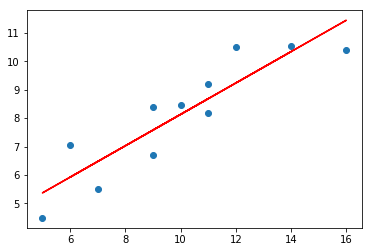

In [64]:
#Plot the scatter graph
plt.scatter(x, y)

# Determine the slope and y intercept
z= np.polyfit(x, y, 1)
m, c = z

# Plotting the best fit line in the domain 0 to 20
plt.plot(x, m*x+c, 'r-')
plt.show()

To check the closeness of my dataset to Anscombes, I calculated several summary statistics, listed below. I immediately noticed that two of my results were always exactly the same as Anscombe's quartet; the mean of x (by design) and the sample variance of x (as a result of that design).

In [35]:
print('Mean of x: ', np.mean(x))
print('Mean of y: ', np.mean(y))
print('Sample Variance of x: ',s.variance(x))
print('Sample Variance of y: ', s.variance(y))

corr = np.corrcoef(x, y)[0, 1]
print('Correlation Coefficient: ', corr)
print('R-squared value: ', corr**2 )

Mean of x:  10.0
Mean of y:  7.994630298444158
Sample Variance of x:  11
Sample Variance of y:  7.773111580861516
Correlation Coefficient:  0.8771940301632817
R-squared value:  0.7694693665541004


Anscombe could have begun his construction this way, but I'm missing at least one essential component of his method. The mean of his y-values is always 7.5. I could have constructed two sets that conformed to the summary statistics but they would have been extremely unlikely to provide the same regression line. 

Further investigation into generating random regression data will be needed to do that. 

## Plotting the Dataset

I plan to display each of the four datasets in a table, as they have very small sample sizes, before plotting them on a scatter diagram.

I will refer to the Quartet as Set 1, Set 2, Set 3, and Set 4, for the purposes of this investigation.

## Set 1

Let's begin by looking at the datapoints in Set 1. I can see that the x values are integers and the y values are float, and there are a total of 11 values in my set. 

In [5]:
## Put the first set in a data frame
set1=df.iloc[0:11]
set1

,x,y,Group,Position
0,10,8.04,A,1
1,8,6.95,A,2
2,13,7.58,A,3
3,9,8.81,A,4
4,11,8.33,A,5
5,14,9.96,A,6
6,6,7.24,A,7
7,4,4.26,A,8
8,12,10.84,A,9
9,7,4.82,A,10


Given that we're dealing with bivariate data, let's plot these data points on a scatter plot. I have included a line of best fit, so we can determinte if linear regression would be a good method for modelling this set.

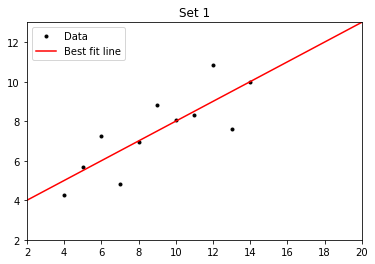

array([0.50009091, 3.00009091])

In [6]:
plt.title('Set 1')
plt.xlim(2, 20)
plt.ylim(2, 13)

# Setting x and y values
x = set1.loc[:, 'x']
y = set1.loc[:, 'y']

# Plotting my points
plt.plot(x, y, 'k.', label="Data")

#Getting the slope m and the y-intercept c of best fit line
z= np.polyfit(x, y, 1)
m, c = z

# Plotting the best fit line in the domain 0 to 20
x=np.arange(0, 21, 1)
plt.plot(x, m*x+c, 'r-', label='Best fit line')

#Show my plot
plt.legend()
plt.show()

## Set 2

Set 2 looks very similar to set 1. I can see that the x values are integers and the y values are floats, and there are a total of 11 values in my set. 

In [10]:
## Put the second set in a data frame
set2=df.iloc[11:22]
set2

,x,y,Group,Position
11,10,9.14,B,1
12,8,8.14,B,2
13,13,8.74,B,3
14,9,8.77,B,4
15,11,9.26,B,5
16,14,8.10,B,6
17,6,6.13,B,7
18,4,3.10,B,8
19,12,9.13,B,9
20,7,7.26,B,10


Will I get a similar set that can be modelled by linear regression?

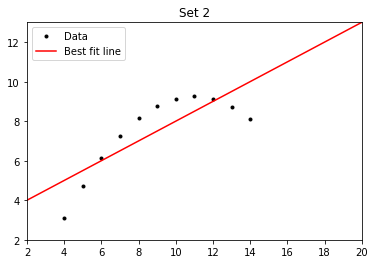

In [11]:
plt.title('Set 2')
plt.xlim(2, 20)
plt.ylim(2, 13)

#Setting x and y values
x = set2.loc[:, 'x']
y = set2.loc[:, 'y']

#Plotting my points
plt.plot(x, y, 'k.', label = 'Data')

#Getting the slope m and the y-intercept c of best fit line
z= np.polyfit(x, y, 1)
m, c = z

# Plotting the best fit line in the domain 0 to 20
x=np.arange(0, 21, 1)
plt.plot(x, m*x+c, 'r-', label='Best fit line')

#Show my plot
plt.legend()
plt.show()

The graph of set 2 is not well represented by a linear regression model. We were not able to surmise this looking at the set alone. 

The points appear to form a curve, and could be better represented by a degree 2 polynomial, also known as a quadratic. So let's plot the data again, but this time fit a degree two polynomial to the data.

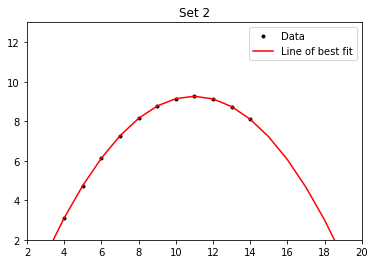

In [12]:
plt.title('Set 2')
plt.xlim(2, 20)
plt.ylim(2, 13)

#Setting x and y values
x = set2.loc[:, 'x']
y = set2.loc[:, 'y']

#Plotting my points
plt.plot(x, y, 'k.', label = 'Data')

#Fitting a curve to the data 
import numpy.polynomial.polynomial as poly
fit_x = np.arange(0, 22, 1)

#Polynomial of degree 2
z= poly.polyfit(x, y, 2)
fit_y = poly.polyval(fit_x, z)

plt.plot(fit_x, fit_y, 'r-', label = 'Line of best fit')

#Show my plot
plt.legend()
plt.show()


This curve fits the data in Set 2, much better than our linear regression model. If I output z, I will now get the coefficients of the polynomial.

In [13]:
z

array([-5.99573427,  2.78083916, -0.12671329])

So, this tells me the equation of this curve is, $-5.998 + 2.781x -0.127x^2$

More traditionally we'd write this in terms of descending powers of $x$.

$y = -0.127x^2 +2.781x - 5.998$

## Set 3

Set 3 again appears similar to the previous two datasets, but that is no guarantee it will appear similar to either of the previous two sets when plotted. 

In [14]:
## Put the third set in a data frame, using Boolean selects this time
set3 = df.loc[df.loc[:, 'Group'] =='C']
set3

,x,y,Group,Position
22,10,7.46,C,1
23,8,6.77,C,2
24,13,12.74,C,3
25,9,7.11,C,4
26,11,7.81,C,5
27,14,8.84,C,6
28,6,6.08,C,7
29,4,5.39,C,8
30,12,8.15,C,9
31,7,6.42,C,10


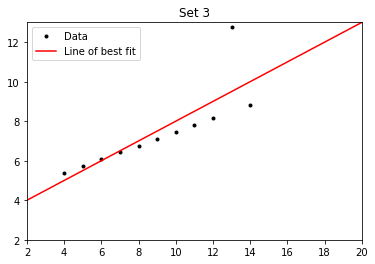

In [15]:
plt.title('Set 3')
plt.xlim(2, 20)
plt.ylim(2, 13)

#Setting x and y values
x = set3.loc[:, 'x']
y = set3.loc[:, 'y']

#Plotting my points
plt.plot(x, y, 'k.', label='Data')

#Getting the slope m and the y-intercept c of best fit line
z= np.polyfit(x, y, 1)
m, c = z

#Plotting the best fit line in the domain 0 to 20
x=np.arange(0, 21, 1)
plt.plot(x, m*x+c, 'r-', label = 'Line of best fit')

#Show my plot
plt.legend()
plt.show()

This data set is best modelled using linear regression, but the line of best fit is skewed due to one outlier. 

The point (13, 12.74) stands out, as it is the only one of our 11 points that is not collinear.

## Set 4 

The fourth set is obviously different when we look at the ordered pairs of points. 

All of the x co-ordinates except one have the same value. Therefore before I plot this graph I can already tell that the graph will not be linear or quadratic.

In [16]:
## Put the fourth set in a data frame
set4 = df.loc[df.loc[:, 'Group'] =='D']
set4

,x,y,Group,Position
33,8,6.58,D,1
34,8,5.76,D,2
35,8,7.71,D,3
36,8,8.84,D,4
37,8,8.47,D,5
38,8,7.04,D,6
39,8,5.25,D,7
40,19,12.50,D,8
41,8,5.56,D,9
42,8,7.91,D,10


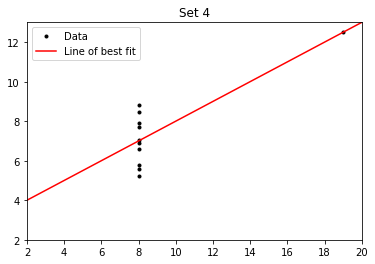

In [17]:
plt.title('Set 4')
plt.xlim(2, 20)
plt.ylim(2, 13)

#Setting x and y values
x = set4.loc[:, 'x']
y = set4.loc[:, 'y']

#Plotting my points
plt.plot(x, y, 'k.', label='Data')

#Getting the slope m and the y-intercept c of best fit line
z= np.polyfit(x, y, 1)
m, c = z

#Plotting the best fit line in the domain 0 to 20
x=np.arange(0, 21, 1)
plt.plot(x, m*x+c, 'r-', label= 'Line of best fit')

#Show my plot
plt.legend()
plt.show()


As expected my plot illustrates that this set has been affected by an outlier, similar to Set 3. 

Ten of the eleven points in Set 4 are best modelled by the vertical line x = 8, but the point (19, 12.50) does not fit that model. 

## Summary Statistics

For the purposes of investigating these four sets I will calculate several summary statistics. 
As a measure of central tendency I will calculate the mean of the x and y variables.
-  **Mean** - an average found by dividing the sum of the variables by the number of variables

To determinte the spread of both x and y variables, I will calculate each of the following:
-  **Sample Variance** - The sum of the squared differences from the mean, divided by (n-1) where there are n variables.
-  **Variance** - The mean of the squared distances from the mean.
-  **Standard Deviation** - The square root of the variance.  

From investigating Anscombe's quartet, I expect that the means and sample variances will provide the same answers across all four sets. 

I hope that the variance and standard deviation may indicate differences in my data sets. 

### Mean and Variance of x

For the purpose of calculating summary statistics, I will examine the x values from each of the four sets first. 

In [28]:
#Locating x values for each set. 
x1 = set1.loc[:, 'x']
x2 = set2.loc[:, 'x']
x3 = set3.loc[:, 'x']
x4 = set4.loc[:, 'x']

I will calculate the mean, sample variance, variance and standard deviation for each of the four sets of x values. 

In [19]:
mean_x1 = np.mean(x1) 
mean_x2 = np.mean(x2)
mean_x3 = np.mean(x3)
mean_x4 = np.mean(x4)

print('The mean of x values in the first set is, %4.0f' % (mean_x1))
print('The mean of x values in the second set is, %3.0f' % (mean_x2))
print('The mean of x values in the third set is, %4.0f' % (mean_x3))
print('The mean of x values in the fourth set is, %3.0f' % (mean_x4))


The mean of x values in the first set is,    9
The mean of x values in the second set is,   9
The mean of x values in the third set is,    9
The mean of x values in the fourth set is,   9


In [20]:
#Calculating the sample variance of the x values 
sam_varx1 = s.variance(x1)
sam_varx2 = s.variance(x2)
sam_varx3 = s.variance(x3)
sam_varx4 = s.variance(x4)

print('The sample variance of x values in the first set is, %4.0f' % (sam_varx1))
print('The sample variance of x values in the second set is, %3.0f' % (sam_varx2))
print('The sample variance of x values in the third set is, %4.0f' % (sam_varx3))
print('The sample variance of x values in the fourth set is, %3.0f' % (sam_varx4))

The sample variance of x values in the first set is,   11
The sample variance of x values in the second set is,  11
The sample variance of x values in the third set is,   11
The sample variance of x values in the fourth set is,  11


In [25]:
varx1 = (np.var(x1))
varx2 = (np.var(x2))
varx3 = np.var(x3)
varx4 = np.var(x4)

print('The variance of x values in the first set is, %4.0f' % (varx1))
print('The variance of x values in the second set is, %3.0f' % (varx2))
print('The variance of x values in the third set is, %4.0f' % (varx3))
print('The variance of x values in the fourth set is, %3.0f' % (varx4))

The variance of x values in the first set is,   10
The variance of x values in the second set is,  10
The variance of x values in the third set is,   10
The variance of x values in the fourth set is,  10


As the actual variance for each of my sets is exactly 10, I know that the standard deviation will also be the same. 

So if I square root one of my variance results, I will get the standard deviation for x values in each of the four sets.

In [27]:
st_x1 = np.sqrt(np.var(x1))

print('The standard deviation of x values is, %.10f' % (st_x1))

The standard deviation of x values is, 3.1622776602


### Mean and Variance of y

I will next investigate the y values from each of the four sets. 

In [30]:
#Locating x values for each set. 
y1 = set1.loc[:, 'y']
y2 = set2.loc[:, 'y']
y3 = set3.loc[:, 'y']
y4 = set4.loc[:, 'y']

I will calculate the mean, sample variance, variance and standard deviation for these values as well.

In [31]:
mean_y1 = np.mean(y1) 
mean_y2 = np.mean(y2)
mean_y3 = np.mean(y3)
mean_y4 = np.mean(y4)

print('The mean of y values in the first set is, %5.2f' % (mean_y1))
print('The mean of y values in the second set is, %3.2f' % (mean_y2))
print('The mean of y values in the third set is, %5.2f' % (mean_y3))
print('The mean of y values in the fourth set is, %3.2f' % (mean_y4))


The mean of y values in the first set is,  7.50
The mean of y values in the second set is, 7.50
The mean of y values in the third set is,  7.50
The mean of y values in the fourth set is, 7.50


In [32]:

sam_vary1 = s.variance(y1)
sam_vary2 = s.variance(y2)
sam_vary3 = s.variance(y3)
sam_vary4 = s.variance(y4)

print('The sample variance of x values in the first set is, %6.3f' % (sam_vary1))
print('The sample variance of x values in the second set is, %5.3f' % (sam_vary2))
print('The sample variance of x values in the third set is, %6.3f' % (sam_vary3))
print('The sample variance of x values in the fourth set is, %5.3f' % (sam_vary4))

The sample variance of x values in the first set is,  4.127
The sample variance of x values in the second set is, 4.128
The sample variance of x values in the third set is,  4.123
The sample variance of x values in the fourth set is, 4.123


In [33]:
vary1 = np.var(y1)
vary2 = np.var(y2)
vary3 = np.var(y3)
vary4 = np.var(y4)

print('The variance of y values in the first set is, %7.2f' % (vary1))
print('The variance of y values in the second set is, %6.2f' % (vary2))
print('The variance of y values in the third set is, %7.2f' % (vary3))
print('The variance of y values in the fourth set is, %6.2f' % (vary4))

The variance of y values in the first set is,    3.75
The variance of y values in the second set is,   3.75
The variance of y values in the third set is,    3.75
The variance of y values in the fourth set is,   3.75


In [34]:
st_y1 = np.sqrt(np.var(y1))

print('The standard deviation of y values is, %5.2f' % (st_y1))

The standard deviation of y values is,  1.94


## Inferential Statistics

### Correlation Coefficient and R-Squared Values

In [102]:
corr1 = np.corrcoef(x1, y1)[0, 1]
corr2 = np.corrcoef(x2, y2)[0, 1]
corr3 = np.corrcoef(x3, y3)[0, 1]
corr4 = np.corrcoef(x4, y4)[0, 1]
print('The correlation coefficient of Set 1 is, %5.3f' % (corr1))
print('The correlation coefficient of Set 2 is, %3.3f' % (corr2))
print('The correlation coefficient of Set 3 is, %5.3f' % (corr3))
print('The correlation coefficient of Set 4 is, %3.3f' % (corr4))


The correlation coefficient of Set 1 is, 0.816
The correlation coefficient of Set 2 is, 0.816
The correlation coefficient of Set 3 is, 0.816
The correlation coefficient of Set 4 is, 0.817


In [103]:
print('The r-squared value of Set 1 is, %.2f' % ((corr1)**2))
print('The r-squared value of Set 2 is, %.2f' % ((corr2)**2))
print('The r-squared value of Set 3 is, %.2f' % ((corr3)**2))
print('The r-squared value of Set 4 is, %.2f' % ((corr4)**2))

The r-squared value of Set 1 is, 0.67
The r-squared value of Set 2 is, 0.67
The r-squared value of Set 3 is, 0.67
The r-squared value of Set 4 is, 0.67


### Equation of the Linear Regression Line

In [104]:
one = np.polyfit(x1, y1, 1)
m, c = one
print('The best fit line equation for Set 1: y= %3.2f x + %3.2f' % (m, c))

two = np.polyfit(x2, y2, 1)
m, c = two
print('The best fit line equation for Set 2: y= %3.2f x + %3.2f' % (m, c))

three= np.polyfit(x2, y2, 1)
m, c = three
print('The best fit line equation for Set 3: y= %3.2f x + %3.2f' % (m, c))

four= np.polyfit(x2, y2, 1)
m, c = four
print('The best fit line equation for Set 4: y= %3.2f x + %3.2f' % (m, c))

The best fit line equation for Set 1: y= 0.50 x + 3.00
The best fit line equation for Set 2: y= 0.50 x + 3.00
The best fit line equation for Set 3: y= 0.50 x + 3.00
The best fit line equation for Set 4: y= 0.50 x + 3.00


## Evaluation 

## References

* [Anscombe's Quartet, Wikipedia page](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), accessed 12th October 2018.
* [The ASA Statistical Computing Section: A History](http://stat-computing.org/computing/history/chambers-ryan.html) by John M. Chambers and Barbara F. Ryan, originally appeared in The American Statistician, May 1990 (Volume 4, No. 2, pp 87-89). Accessed 12th October 2018.
* [A Brief History of Data Visualization (Archived Link)](https://web.archive.org/web/20160531195841/http://www.datavis.ca/papers/hbook.pdf) by Michael Friendly, Handbook of Computational Statistics: Data Visualization, 2006. Accessed 12th October 2018.
* [Graphs in statistical analysis](http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf) by Francis Anscombe, American Statistician, 27, 17–21, 1973. Accessed 13th October 2018.
* Stack Overflow Webpages Consulted
    * [Fitting Data with NumPy](http://stackoverflow.com/questions/18767523/fitting-data-with-numpy)
* Jupyter Notebook Documentation
    * [Examples: Working with Markdown Cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
* NumPy Documentation 
    * [Numpy.Polyfit](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html)